<a href="https://colab.research.google.com/github/leusto/ciencia_de_dados/blob/main/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise Exploratória de Dados**
##*Prof. Dr. Leandro Augusto da Silva*



###Case: Iris dataset

Trata-se de um conjunto de dados clássico usado para análise de dados de maneira geral e, principalmente, para validação de algoritmos de aprendizagem de máquina. 

O objetivo desta atividade é fazer dois tipos de explorações sob os dados:

1) enriquecer o conjunto de dados (dataset) com o levantamento de metadados como dimensão, tipos de atributos e medidas de resumo;

2) explorar analiticamente o dataset com o uso de estatística descritiva (medida de tendência central, variabilidade) e métodos gráficos para se ter ideias de tipos de análises que podem ser realizadas. Como aqui se trata da primeira exploração de dados, a seguir serão definidas algumas propostas de análises com a finalidade de tornar os estudos mais bem direcionados. Nesse sentido, um case de estudo será definido e apresentado a seguir.

As bibliotecas utilizadas na solução deste case são:

In [ ]:
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

Neste case será usado um dataset disponível na biblioteca do sklearn:

In [ ]:
iris = datasets.load_iris()

Os atributos deste dataset são:

In [ ]:
X = pd.DataFrame(iris.data[:, :4])
y = pd.DataFrame(iris.target)
iris_df = pd.concat([X,y], axis=1)
iris_df
iris_df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
print(iris_df)


     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


e os tipos dos atributos: 

In [ ]:
iris_df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species           int64
dtype: object

o conjunto de dados tem a seguinte dimensão

In [ ]:
iris_df.shape

(150, 5)

Para se ter um exemplo do conjunto de dados, apresenta-se os quatro primeiros conjuntos de dados do dataset:

In [ ]:
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Para fins de análise em muitas situações é importante manipular partes específicas do dataset. Apresenta-se a seguir algumas opções de seleção de dados.

A primeira é selecionando uma coluna do conjunto de dsdos por nome do atributo (dataframe):

In [ ]:
sl = iris_df["Sepal_Length"]
print(sl)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal_Length, Length: 150, dtype: float64


De forma equivalente se pode manipular pelo indice da coluna (matricial):

In [ ]:
sl = iris_df.iloc[: ,0]
sl

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal_Length, Length: 150, dtype: float64

Pode-se ainda selecionar mais de uma coluna do conjunto de dados:

In [ ]:
sel_cols = iris_df.iloc[:,[0,1]]
print(sel_cols)

     Sepal_Length  Sepal_Width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]



De forma análoga a manipulação de atributos, pode-se manipular as linhas como segue o exemplo abaixo que seleciona os cinco primeiros conjuntos de dados e as duas primeiras colunas do dataset:

In [ ]:
sel_rows = iris_df.iloc[0:5,[0,1]]
print(sel_rows)

   Sepal_Length  Sepal_Width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6


Agora inicia-se a etapa de análise exploratória de dados. A primeira análise é feita por um resumo estatístico do conjunto de dados:

In [ ]:
iris_df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Porém se pode fazer medidas específicas com cálculos de estatística exploratória. Separando um atributo do dataset para os exemplos:

In [ ]:
sl = iris_df["Sepal_Length"]

Calculando a média:

In [ ]:
media_sl = np.mean(sl)
print(media_sl)

5.843333333333334


mediana:

In [ ]:
mediana_sl = np.median(sl)
print(mediana_sl)

5.8


variância

In [ ]:
variancia_sl = np.var(sl)
print(variancia_sl)

0.6811222222222223


desvio padrão 

In [ ]:
desvio_padrao_sl = np.std(sl)
print(desvio_padrao_sl)

0.8253012917851409


Assim como é importante os cálculos de medias de resumo estatístico, também é importante se ter informações das faixas de valores. Por exemplo, valor minimo do atributo:

In [ ]:
sl_min = np.min(sl)
print(sl_min)

4.3


valor máximo

In [ ]:
sl_max = np.max(sl)
print(sl_max)

7.9


Agora se inicia a análise exploratória visual dos dados. A primeira é um gráfico de dispersão:

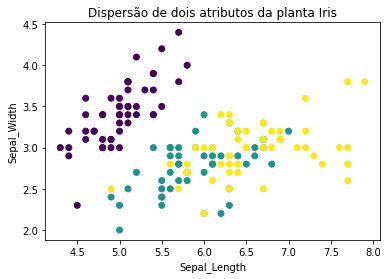

In [ ]:
X = iris.data[:, :4]
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.title("Dispersão de dois atributos da planta Iris")
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")
plt.show()

In [ ]:
iris_df = datasets.load_iris(return_X_y=True, as_frame=True)

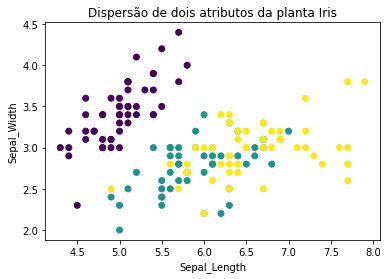

In [ ]:
plt.scatter(iris_df["Sepal_Length"], iris_df["Sepal_Width"], c=iris_df["Species"], label=iris_df["Species"])
plt.title("Dispersão de dois atributos da planta Iris")
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")
plt.show()


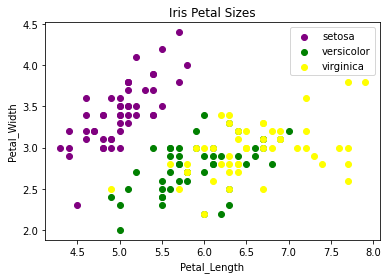

In [ ]:
setosa = iris_df[iris_df["Species"] == 0]
versicolor = iris_df[iris_df["Species"] == 1]
virginica = iris_df[iris_df["Species"] == 2]

fig, ax = plt.subplots()
points = ax.scatter(setosa["Sepal_Length"], setosa["Sepal_Width"], label="setosa", facecolor="purple")
ax.scatter(versicolor["Sepal_Length"], versicolor["Sepal_Width"], label="versicolor", facecolor="green")
ax.scatter(virginica["Sepal_Length"], virginica["Sepal_Width"], label="virginica", facecolor="yellow")

ax.set_title("Iris Petal Sizes")
ax.set_xlabel("Petal_Length")
ax.set_ylabel("Petal_Width")
ax.legend()


Em outras análises se deseja saber a distribuição de um atributo específico:

Text(0, 0.5, 'sepal length in cm')

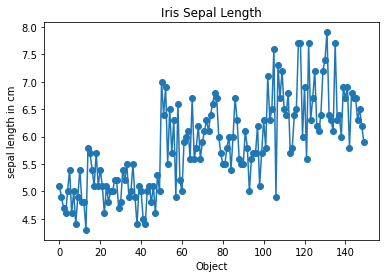

In [ ]:
fig, ax = plt.subplots()
ax.plot(sl, marker="o")
ax.set_title("Iris Sepal Length")
ax.set_xlabel("Object")
ax.set_ylabel("sepal length in cm")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26647a9a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26647c7790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26647a9a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f266481f610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f266481f9d0>],
 'means': []}

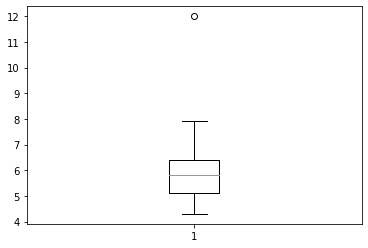

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(iris_df["Sepal_Length"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f26645c4e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2664508710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26645ab7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2664516750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26644afc90>],
 'means': []}

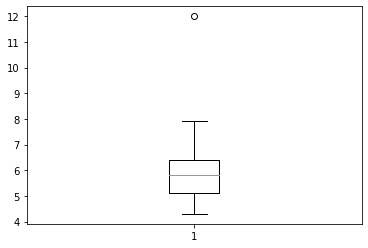

In [ ]:
sl[1] = 12#4.9#sl[1] + 10
fig, ax = plt.subplots()
ax.boxplot(sl)

COLOCAR AQUI O GRAFICO DE DISPERSAO

In [ ]:
count = np.histogram(iris_df["Species"], bins=3)
print(count[0])

[50 50 50]


(-1.100000018898756,
 1.1000000353324482,
 -1.1000000262939185,
 1.1000000098602216)

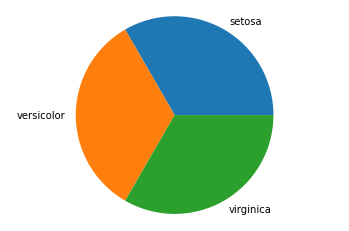

In [ ]:
labels = ['setosa','versicolor','virginica']

fig, ax = plt.subplots()
ax.pie(count[0], labels = labels)
ax.axis('equal')

Gráfico de histograma com a distribuição do SEPAL_LENGTH

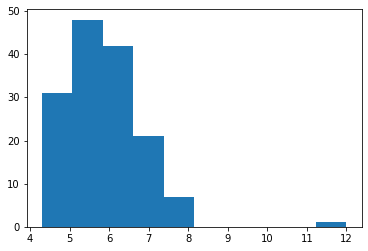

In [ ]:
plt.hist(sl)
plt.show() 

Existem ainda outras formas de plotagem como no exemplo abaixo:

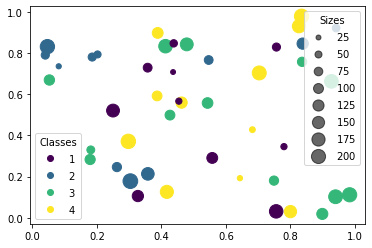

In [ ]:
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

#**Exercícios**:

Referências

https://www.w3schools.com/python/python_examples.asp

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

https://stackabuse.com/matplotlib-pie-chart-tutorial-and-examples/

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

https://www.tutorialspoint.com/numpy/numpy_histogram_using_matplotlib.htm

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

https://www.w3schools.com/python/ref_string_count.asp


Instalação do Spyder

https://docs.spyder-ide.org/current/installation.html

https://github.com/spyder-ide/spyder-notebook

https://docs.spyder-ide.org/5/plugins/notebook.html

https://python.org.br/instalacao-mac/#:~:text=Instala%C3%A7%C3%A3o,de%20pacotes%20pip%20e%20homebrew.

https://python-guide-pt-br.readthedocs.io/pt_BR/latest/starting/install3/osx.html

https://docs.spyder-ide.org/current/installation.html

https://docs.spyder-ide.org/current/installation.html